# **TAREA 5 - VISIÓN DE MÁQUINA**

**Universidad Nacional de Colombia** <br>
**Maestría en Ingeniería - Automatización industrial**

Juan Sebastián Hernandez Reyes; Julián Felipe Molina Grisales

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') #Comando para montar carpeta de drive en Google Colab

Mounted at /content/drive


Tamaño de la imagen: (512, 512)


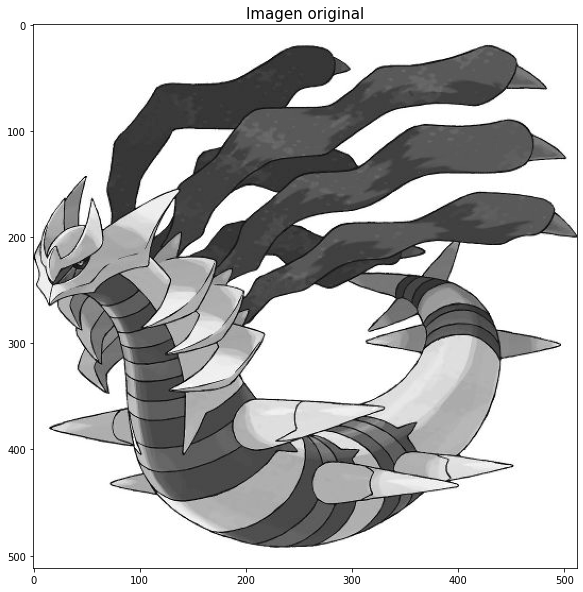

In [ ]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage import util as sk

img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/Vision_Maquina/Tarea5/giratina.jpg',0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
N, M = img.shape[:2]               #Tamaño de la imagen
print("Tamaño de la imagen: ({}, {})".format(N,M))

plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen original', fontsize = 15)
plt.show()

### 1.   Implemente, como una función de OpenCV, los filtros Chebyshev Tipo I: pasa-bajo, pasa-alto y pasa-banda.


---

---





In [ ]:
def cheb_polynomial(x,n):
  if n == 0:
    return 1
  elif n == 1:
    return x
  return 2*x*cheb_polynomial(x,n-1)-cheb_polynomial(x,n-2)

def chebI_lp_2D(shape, D0, n, A):
  e = np.sqrt(np.power(10,A/10)-1)
  N,M = shape[:2]
  u = np.linspace(-0.5,0.5,M)*M
  v = np.linspace(-0.5,0.5,N)*N
  D = np.sqrt((u**2)[np.newaxis]+(v**2)[:, np.newaxis])
  T = cheb_polynomial(D/D0,n)
  H = 1/np.sqrt(1+(e**2)*(T**2))
  #H = 1/(1+(e**2)*(T**2))
  return H

def chebI_hp_2D(shape, D0, n, A):
  return 1-chebI_lp_2D(shape,D0,n,A)

def chebI_bp_2D(shape, D0, D1, n, A):
  return chebI_lp_2D(shape,D1,n,A)-chebI_lp_2D(shape,D0,n,A)

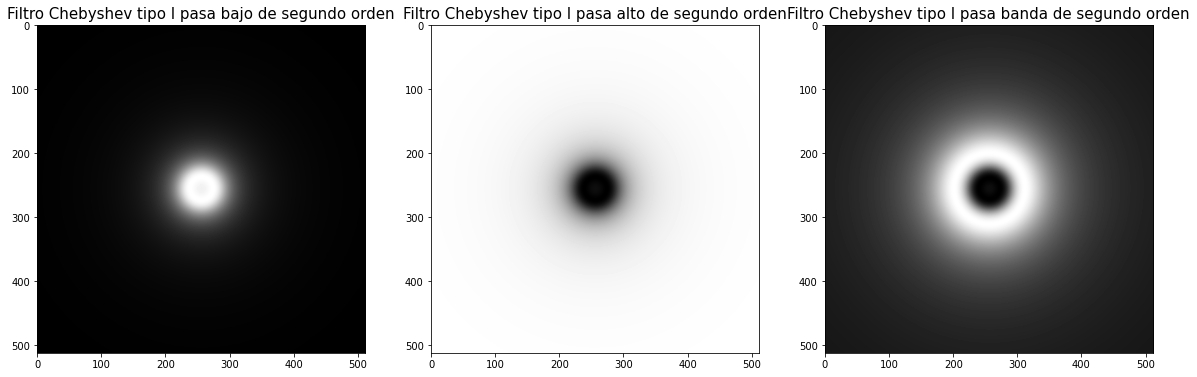

In [ ]:
D0 = 25
D1 = 50
n = 2
A = 0.5
Hlp = chebI_lp_2D(img.shape,D0,n,A)
Hhp = chebI_hp_2D(img.shape,D0,n,A)
Hbp = chebI_bp_2D(img.shape,D0,D1,n,A)


plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(Hlp, cmap=plt.cm.gray), plt.title('Filtro Chebyshev tipo I pasa bajo de segundo orden', fontsize = 15)
plt.subplot(132),plt.imshow(Hhp, cmap=plt.cm.gray), plt.title('Filtro Chebyshev tipo I pasa alto de segundo orden', fontsize = 15)
plt.subplot(133),plt.imshow(Hbp, cmap=plt.cm.gray), plt.title('Filtro Chebyshev tipo I pasa banda de segundo orden', fontsize = 15)
plt.show()

Se observa el resultado aceptable de los tres tipos de filtros necesarios en el dominio de la frecuencia.

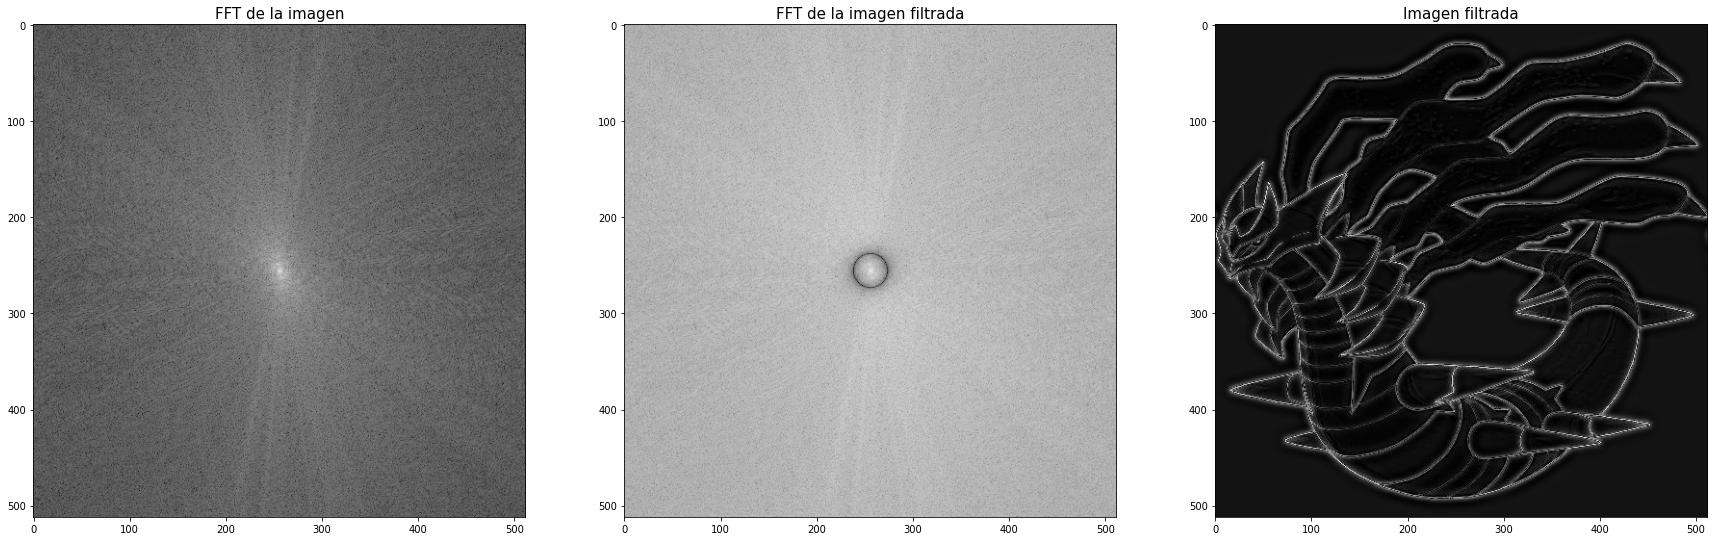

In [ ]:
imgF = np.fft.fftshift(np.fft.fft2(img))
F = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft2(img))))
#F = np.abs(np.fft.fftshift(np.fft.fft2(img)))

G = Hhp*imgF
imgFilt = np.abs(np.fft.ifft2(np.fft.fftshift(G)))

plt.figure(figsize=(30,30))
plt.subplot(131),plt.imshow(F, cmap=plt.cm.gray), plt.title('FFT de la imagen', fontsize = 15)
plt.subplot(132),plt.imshow(20*np.log10(np.abs(G)), cmap=plt.cm.gray), plt.title('FFT de la imagen filtrada', fontsize = 15)
plt.subplot(133),plt.imshow(imgFilt, cmap=plt.cm.gray), plt.title('Imagen filtrada', fontsize = 15)
plt.show()

Al aplicar el filto pasa-altas a la imagen se observa como se hace una identificación de bordes, el resultado esperado según la teoría.

### 2.   Con imágenes sintéticas y reales, evaluar las técnicas de realce de imágenes, tanto en el dominio espacial como en el dominio frecuencial.

In [ ]:
def ideal_lp_2D(shape, D0, n):
  N,M = shape[:2]
  u = np.linspace(-0.5,0.5,M)*M
  v = np.linspace(-0.5,0.5,N)*N
  D = np.sqrt((u**2)[np.newaxis]+(v**2)[:, np.newaxis])
  H = np.zeros((N,M))
  H[D<=D0] = 1 
  return H

def ideal_hp_2D(shape, D0, n):
  return 1-ideal_lp_2D(shape,D0,n)

def ideal_bp_2D(shape, D0, D1, n):
  return ideal_lp_2D(shape,D1,n)-ideal_lp_2D(shape,D0,n)

In [ ]:
def butt_lp_2D(shape, D0, n):
  N,M = shape[:2]
  u = np.linspace(-0.5,0.5,M)*M
  v = np.linspace(-0.5,0.5,N)*N
  D = np.sqrt((u**2)[np.newaxis]+(v**2)[:, np.newaxis])
  H = 1/np.sqrt(1+(D/D0)**(2*n))
  #H = 1/(1+(e**2)*(T**2))
  return H

def butt_hp_2D(shape, D0, n):
  return 1-butt_lp_2D(shape,D0,n)

def butt_bp_2D(shape, D0, D1, n):
  return butt_lp_2D(shape,D1,n)-butt_lp_2D(shape,D0,n)

In [ ]:
def gauss_lp_2D(shape, D0):
  N,M = shape[:2]
  u = np.linspace(-0.5,0.5,M)*M
  v = np.linspace(-0.5,0.5,N)*N
  D = np.sqrt((u**2)[np.newaxis]+(v**2)[:, np.newaxis])
  p = -0.5*((D/D0)**2)
  H = np.exp(p)
  return H

def gauss_hp_2D(shape, D0):
  return 1-gauss_lp_2D(shape,D0)

def gauss_bp_2D(shape, D0, D1):
  return gauss_lp_2D(shape,D1)-gauss_lp_2D(shape,D0)

In [ ]:
def laplacian(shape):
  N,M = shape[:2]
  u = np.linspace(-0.5,0.5,M)*M
  v = np.linspace(-0.5,0.5,N)*N
  H = -((u**2)[np.newaxis]+(v**2)[:,np.newaxis])
  return H

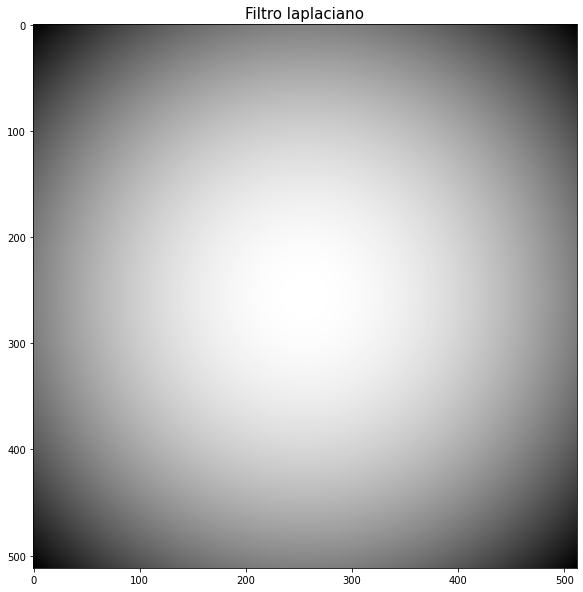

In [ ]:
lap = laplacian((N,M))

plt.figure(figsize=(10,10))
plt.imshow(lap, cmap=plt.cm.gray), plt.title('Filtro laplaciano', fontsize = 15)
plt.show()

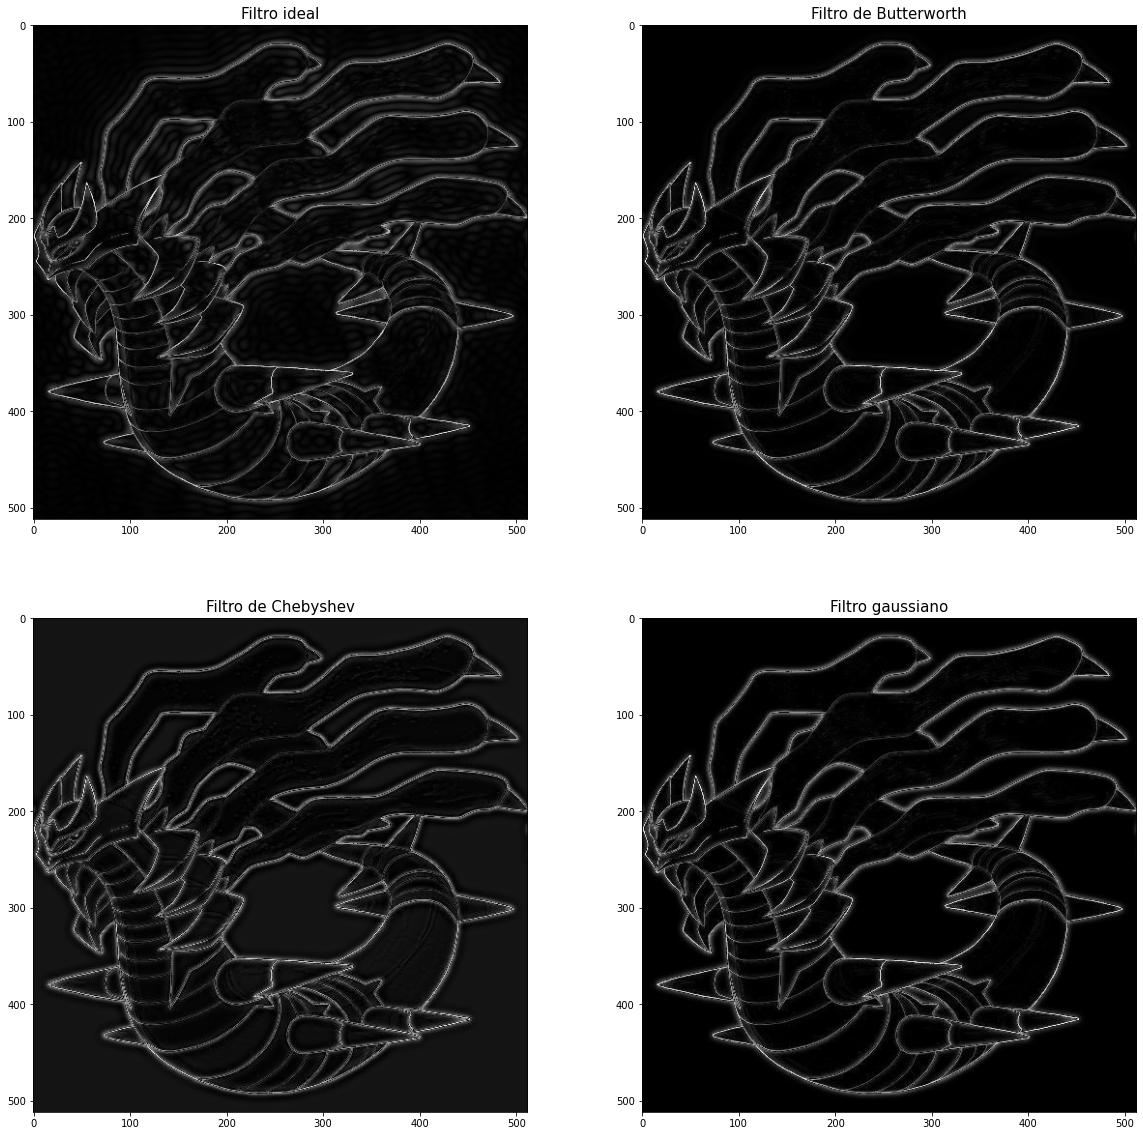

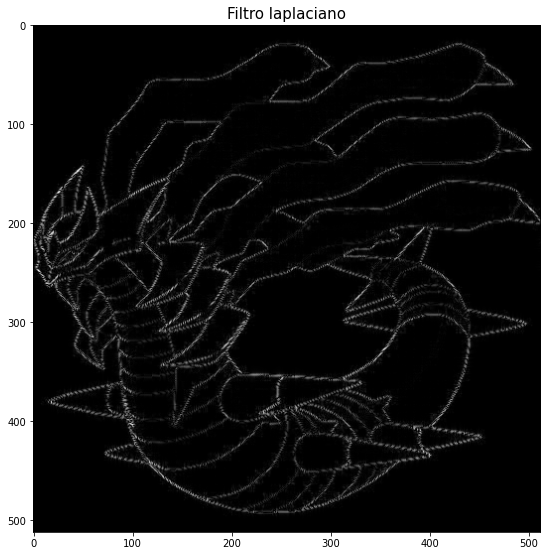

In [ ]:
D0 = 30
Amax = 0.5

Hid = ideal_hp_2D(img.shape, D0, n)
Hbt = butt_hp_2D(img.shape, D0, n)
Hch = chebI_hp_2D(img.shape,D0,n,Amax)
Hga = gauss_hp_2D(img.shape,D0)
Hlp = laplacian(img.shape)

Gid = Hid*imgF
Gbt = Hbt*imgF
Gch = Hch*imgF
Gga = Hga*imgF
Glp = Hlp*imgF

imgID = np.abs(np.fft.ifft2(np.fft.fftshift(Gid)))
imgBT = np.abs(np.fft.ifft2(np.fft.fftshift(Gbt)))
imgCH = np.abs(np.fft.ifft2(np.fft.fftshift(Gch)))
imgGA = np.abs(np.fft.ifft2(np.fft.fftshift(Gga)))
imgLP = np.abs(np.fft.ifft2(np.fft.fftshift(Glp)))

plt.figure(figsize=(20,20))
plt.subplot(221),plt.imshow(imgID, cmap=plt.cm.gray), plt.title('Filtro ideal', fontsize = 15)
plt.subplot(222),plt.imshow(imgBT, cmap=plt.cm.gray), plt.title('Filtro de Butterworth', fontsize = 15)
plt.subplot(223),plt.imshow(imgCH, cmap=plt.cm.gray), plt.title('Filtro de Chebyshev', fontsize = 15)
plt.subplot(224),plt.imshow(imgGA, cmap=plt.cm.gray), plt.title('Filtro gaussiano', fontsize = 15)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(imgLP, cmap=plt.cm.gray), plt.title('Filtro laplaciano', fontsize = 15)
plt.show()

Al implementar los filtros pasaaltos estudiados capaces de identificar los bordes de la imagen, se nota que el mejor desemepeño lo tienen los filtros de Butterworth y gaussiando, puesto que los bordes de la imagen se encuentran limpios y sin efectos de desenfoque ni anilleo. Por esta razón se deciden implementar los filtros *high boost* y de *enfasis en alta frecuencia* con el filtro pasaaltos Butterworth de segundo orden.

In [ ]:
#Filtro high-boost
def high_boost(shape, D0, n, A):
  return (A-1)+butt_hp_2D(shape,D0,n)

#Filtro de enfasis de alta frecuencia
def highfec(shape, D0, n, a, b):
  return a+b*butt_hp_2D(shape,D0,n)

Así los métodos de realce de imágenes en el dominio de la frecuencia estudiados son:

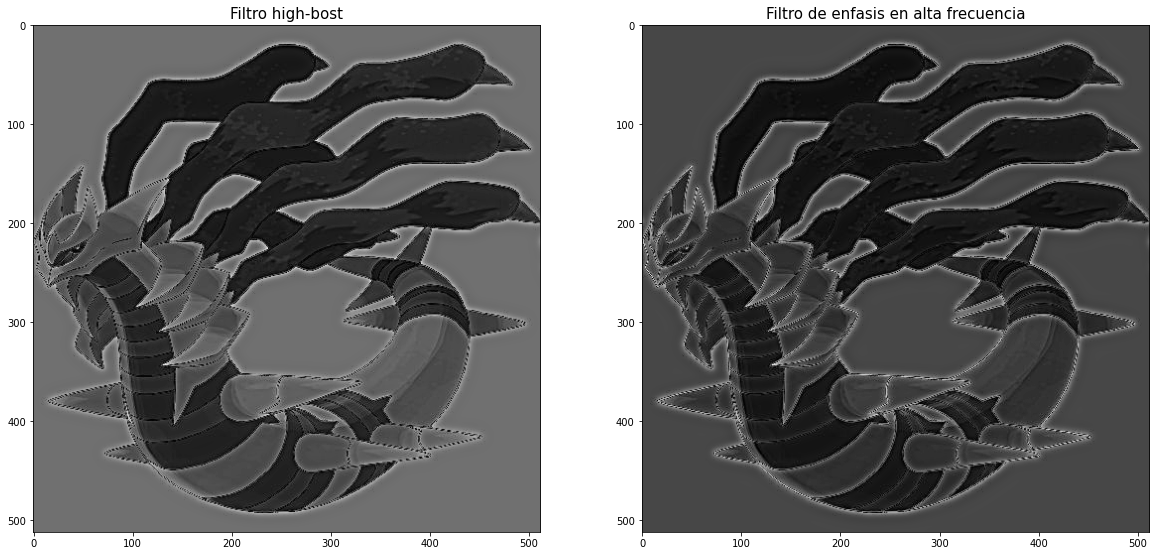

In [ ]:
A = 1.5
a = 0.5
b = 2

Hhb = high_boost(img.shape,D0,n,A)
Hhe = highfec(img.shape,D0,n,a,b)

Ghp = Hhb*imgF
Ghe = Hhe*imgF

imghp = np.abs(np.fft.ifft2(np.fft.fftshift(Ghp)))
imghe = np.abs(np.fft.ifft2(np.fft.fftshift(Ghe)))

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(imghp, cmap=plt.cm.gray), plt.title('Filtro high-bost', fontsize = 15)
plt.subplot(122),plt.imshow(imghe, cmap=plt.cm.gray), plt.title('Filtro de enfasis en alta frecuencia', fontsize = 15)
plt.show()

In [ ]:
def convolve2D(image, kernel, padding=2, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

Los métodos de realce en el dominio espacial son:

In [ ]:
#Filtro laplaciano

def laplacian_filter(img):
  lp_mask = np.array([[-1,-1,-1],
                      [-1,9,-1],
                      [-1,-1,-1]])
  img_lp = convolve2D(img,lp_mask,padding=1,strides=1)
  return img_lp

In [ ]:
#Filtro de Sobel

def sobel_filter(img):
  hor_mask = np.array([[-1,-2,-1],
                       [0,0,0],
                       [1,2,1]])
  ver_mask = np.array([[-1,0,1],
                       [-2,0,2],
                       [-1,0,1]])
  hor_img = convolve2D(img,hor_mask,padding=1,strides=1)
  ver_img = convolve2D(img,ver_mask,padding=1,strides=1)
  return np.sqrt(hor_img**2+ver_img**2)

In [ ]:
#Filtro de Prewitt

def prewitt_filter(img):
  N = np.array([[-1,-1,-1],
                [1,-2,1],
                [1,1,1]])
  S = np.array([[1,1,1],
                [1,-2,1],
                [-1,-1,-1]])
  E = np.array([[1,1,-1],
                [1,-2,-1],
                [1,1,-1]])
  O = np.array([[-1,1,1],
                [-1,-2,1],
                [-1,1,1]])
  SO = np.array([[1,1,1],
                [-1,-2,1],
                [-1,-1,1]])
  NO = np.array([[-1,-1,1],
                [-1,-2,1],
                [1,1,1]])
  SE = np.array([[1,1,1],
                [1,-2,-1],
                [1,-1,-1]])
  NE = np.array([[1,-1,-1],
                [1,-2,-1],
                [1,1,1]])
  N_img = convolve2D(img,N,padding=1,strides=1)
  S_img = convolve2D(img,S,padding=1,strides=1)
  E_img = convolve2D(img,E,padding=1,strides=1)
  O_img = convolve2D(img,O,padding=1,strides=1)
  SO_img = convolve2D(img,SO,padding=1,strides=1)
  NO_img = convolve2D(img,NO,padding=1,strides=1)
  SE_img = convolve2D(img,SE,padding=1,strides=1)
  NE_img = convolve2D(img,NE,padding=1,strides=1)
  return np.sqrt(N_img**2+S_img**2+E_img**2+O_img**2+SO_img**2+NO_img**2+SE_img**2+NE_img**2)

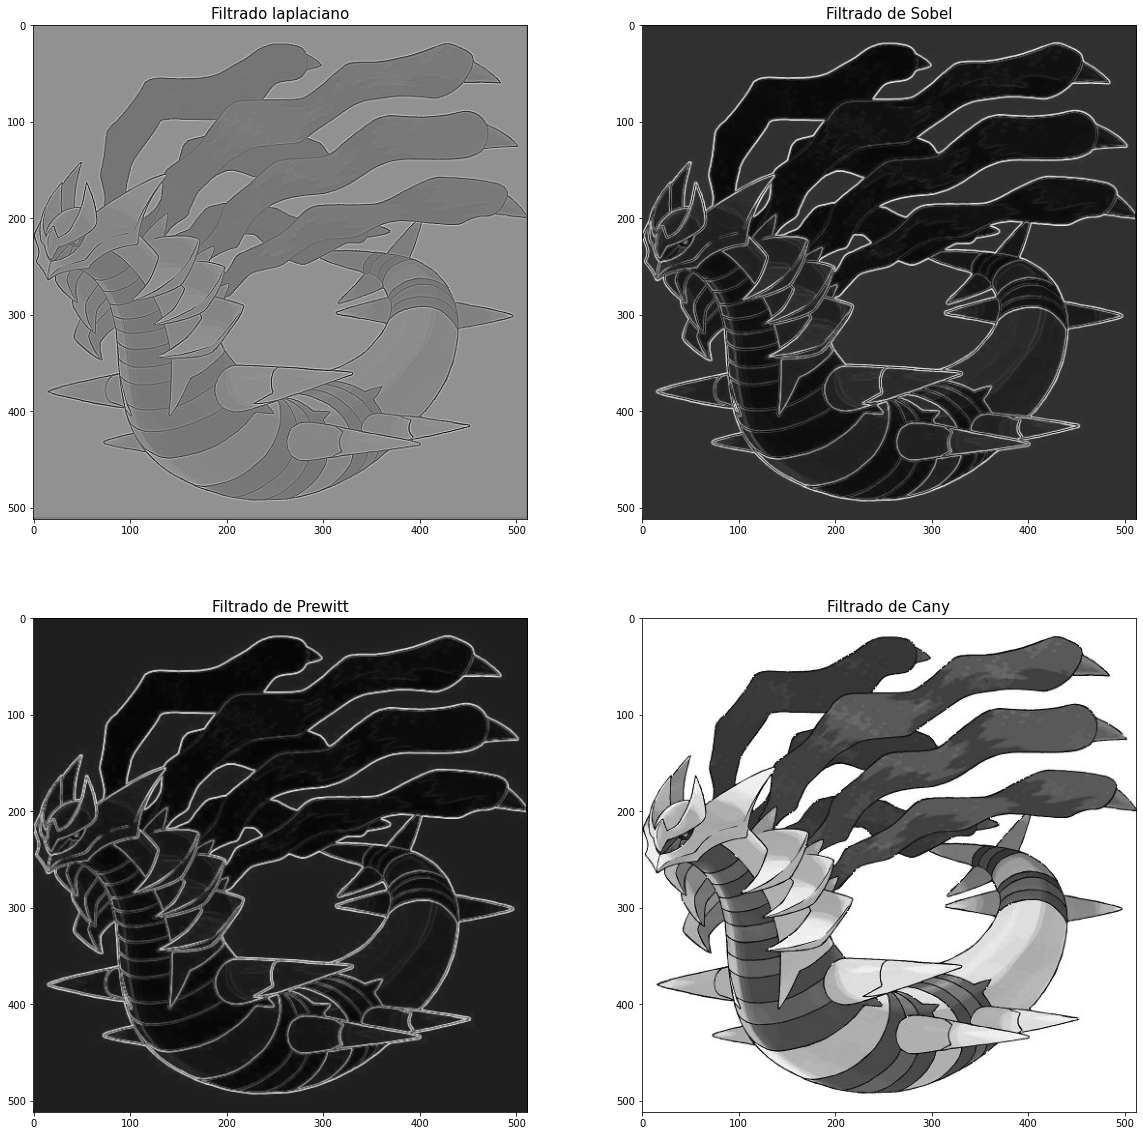

In [ ]:
#Filtro laplaciano
img_lp = laplacian_filter(img)+img
#Filtro de Sobel
img_sb = sobel_filter(img)+img
#Filtro de Prewitt
img_pr = prewitt_filter(img)+img
#Filtro de Cany
img_ca = cv2.Canny(img,100,200)+img

plt.figure(figsize=(20,20))
plt.subplot(221),plt.imshow(img_lp, cmap=plt.cm.gray), plt.title('Filtrado laplaciano', fontsize = 15)
plt.subplot(222),plt.imshow(img_sb, cmap=plt.cm.gray), plt.title('Filtrado de Sobel', fontsize = 15)
plt.subplot(223),plt.imshow(img_pr, cmap=plt.cm.gray), plt.title('Filtrado de Prewitt', fontsize = 15)
plt.subplot(224),plt.imshow(img_ca, cmap=plt.cm.gray), plt.title('Filtrado de Cany', fontsize = 15)
plt.show()

Se observa como el filtro de Cany es el más efectivo en realizar el realce de los bordes de la imagen, el filtro Laplaciano entrega un resultado aceptable pero con cierta atenuación del contraste, por otro lado los filtros de Sobel y Prewitt realizan una identificación de bordes aceptable pero sin un buen realce.